**IFSP - Campus Campinas** <br>
**Pós-graduação em Ciência de Dados** <br>

**TCC - Avaliação de Projetos de Lei usando técnicas de NLP/ML**

#### Sprint 6 (AWS) - v 1.6 (AWS)
- limpeza inicial de linhas com NaN no campo 'Texto'
- pre-processamento com NTLK
- feature extraction com pipelines e um ColumnTransformer
  * Para o pipeline de dados numéricos, o __numerical_processor__ usa um MinMaxScaler. 
  * Para o pipeline de dados de texto, o __text_processor__ usa  `CountVectorizer()` nos campos de texto.
- treinamento com LinearLearner() do SageMaker
- rodado em AWS

Ref.1: Curso online de AWS Sagmaker/ Machine Learning - Lab 2.1 <br>
Ref.2: Call an Amazon SageMaker model endpoint using Amazon API Gateway and AWS Lambda <br>
https://aws.amazon.com/pt/blogs/machine-learning/call-an-amazon-sagemaker-model-endpoint-using-amazon-api-gateway-and-aws-lambda/


Orientadora: Bianca Maria Pedrosa - IFSP Campinas<br>
Aluno: Swift Motoo Yaguchi - CP301665X

------

# Etapa de limpeza e pré-processamento

**Instalando bibliotecas**

In [1]:
#Upgrade dependencies
#!pip install --upgrade pip
#!pip install --upgrade scikit-learn
!pip install --upgrade wordcloud
#!pip install --upgrade sagemaker

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 18.1 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np

##### Leitura da base de dados

In [43]:
#df = pd.read_csv('PLO_2019_v4a.csv', sep=';', encoding = 'latin1')
df = pd.read_csv('PLO_2019_v5.csv', sep=';')
df.head(3)

,Vereador,Partido,Aprovado,Ementa,Texto
0,Ailton da Farmácia,PSD,sim,DECLARA ÓRGÃO DE UTILIDADE PÚBLICA MUNICIPAL A...,Art. I Q Fica declarada órgão de utilidade púb...
1,Ailton da Farmácia,PSD,sim,DENOMINA PRAÇA ZILDA MELLO SMILGYS UMA PRAÇA P...,Art. I P Fica denominada Praça Zilda Mello Smi...
2,Ailton da Farmácia,PSD,sim,DENOMINA RUA JOSÉ LATARO UMA VIA PÚBLICA DO MU...,Art. 10 Fica denominada Rua José Lataro a Rua ...


### Etapa de limpeza e pré-processamento

In [4]:
df.dtypes

Vereador    object
Partido     object
Aprovado    object
Ementa      object
Texto       object
dtype: object

In [5]:
# Verificando se base de dados tem valores ausentes
df.isna().sum()

Vereador    0
Partido     0
Aprovado    0
Ementa      0
Texto       0
dtype: int64

In [6]:
print('O tamanho do dataset é:', df.shape)

O tamanho do dataset é: (370, 5)


In [7]:
df['Aprovado'].value_counts()

Aprovado
não    189
sim    181
Name: count, dtype: int64

### Conversão de colunas de vereador, partido, aprovado em numéricos

In [44]:
# Criar um dicionário de mapeamento para os valores numéricos
partido_numerico = {'PSC': 1, 'PSB': 2, 'PSDB': 3, 'PSD': 4, 'PT': 5, 'PV': 6,'Prefeito': 7, 'PR': 8, 'PTN': 9, 'PPS': 10, 'PROS': 11, 'PP': 12,'PRB': 13, 'PC do B': 14, 'PTB': 15, 'DEM': 16, 'PMB': 17, 'PSOL': 18,'Câmara': 19}
# Substituir os valores de texto pelos valores numéricos
df['Partido'] = df['Partido'].map(partido_numerico)

In [45]:
# Criar um dicionário de mapeamento para os valores numéricos
vereador_numerico = {'Paulo Galterio': 1, 'Carlão do PT': 2, 'Luiz Rossini': 3, 'Marcelo Silva': 4, 'Jorge da Farmácia': 5, 'Nelson Hossri': 6, 'Marcos Bernardelli': 7, 'Zé Carlos': 8, 'Luiz Cirilo': 9, 'Professor Alberto': 10, 'Paulo Haddad': 11, 'Tenente Santini': 12, 'Permínio Monteiro': 13, 'Pedro Tourinho': 14, 'Cidão Santos': 15, 'Filipe Marchesi': 16, 'Cláudio da Farmácia': 17, 'Gustavo Petta': 18, 'Jorge Schneider': 19, 'Rubens Gás': 20, 'Fernando Mendes': 21, 'Pr. Elias Azevedo': 22, 'Gilberto Vermelho': 23, 'Juscelino da Barbarense': 24, 'Ailton da Farmácia': 25, 'Vinicius Gratti': 26, 'Jota Silva': 27, 'Mesa da Câmara': 28, 'Mariana Conti': 29, 'Dr. Elcio Batista': 30, 'Campos Filho': 31, 'Aurélio Cláudio': 32, 'Rodrigo da Farmadic': 33, 'Guida Calixto': 34, 'Carmo Luiz': 35, 'Prefeito Municipal': 36}
#Substituir os valores de texto pelos valores numéricos
df['Vereador'] = df['Vereador'].map(vereador_numerico)

In [46]:
# Criar um dicionário de mapeamento para os valores numéricos
aprovado_numerico = {'sim': 1, 'não': 0}
#Substituir os valores de texto pelos valores numéricos
df['Aprovado'] = df['Aprovado'].map(aprovado_numerico)

In [47]:
df

,Vereador,Partido,Aprovado,Ementa,Texto
0,25,4,1,DECLARA ÓRGÃO DE UTILIDADE PÚBLICA MUNICIPAL A...,Art. I Q Fica declarada órgão de utilidade púb...
1,25,4,1,DENOMINA PRAÇA ZILDA MELLO SMILGYS UMA PRAÇA P...,Art. I P Fica denominada Praça Zilda Mello Smi...
2,25,4,1,DENOMINA RUA JOSÉ LATARO UMA VIA PÚBLICA DO MU...,Art. 10 Fica denominada Rua José Lataro a Rua ...
3,25,4,1,DENOMINA PRAÇA ROBERTO ANGELO CASTELLO UMA ÁRE...,Art. 1 0 Fica denominada Praça Roberto Angelo ...
4,25,4,0,DISPÕE SOBRE A GRATUIDADE POR ATÉ DUAS HORAS D...,Art. 1 0 Institui a gratuidade por até duas ho...
...,...,...,...,...,...
365,8,2,1,INSTITUI A SEMANA DOS ESPORTES ELETRÔNICOS PLA...,Art. I P Fica instituída a Semana dos Esportes...
366,8,2,1,DENOMINA PRAÇA ANTONIO ALEXANDRE SOBRINHO UM S...,Art. 1 0 Fica denominado Praça Antonio Alexand...
367,8,2,0,DISPÕE SOBRE O PARCELAMENTO DO IMPOSTO SOBRE A...,Art. 10 A critério da Secretaria Municipal de ...
368,8,2,0,"ALTERA, SUPRIME E ACRESCENTA DISPOSITIVOS NA L...","Art. I Q Fica alterado o inciso IV do S 2 2, f..."


### Processamento de texto: remoção de palavras irrelevantes e stemming
Remoção com bilioteca [nltk](https://www.nltk.org/)

In [48]:
!pip install --upgrade nltk

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


In [49]:
# Install the library and functions
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/ec2-user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [50]:
import nltk, re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize

# Get a list of stopwords from the NLTK library
stop = stopwords.words('portuguese')

# New stopword list
# stopwords = [word for word in stop if word not in excluding]
#stopwords = [word for word in stop]
# Add 'Art' and 'Lei' to the stopwords list
sto = stop + ['art', 'lei']
stopwords = [word for word in sto]

In [51]:
print(stopwords)

['a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'às', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois', 'do', 'dos', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', 'éramos', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estou', 'eu', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'formos', 'fosse', 'fossem', 'fôssemos', 'fui', 'há', 'haja', 'hajam', 'hajamos', 'hão', 'havemos', 'haver', 'hei', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'houveram', 'houvéramos', 'houverão', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houveríamos', 'houvermos', 'houvesse', 'houvessem', 'houvésse

In [52]:
snow = SnowballStemmer('portuguese')

Remoções:
- Substitui todos os valores ausentes por uma string vazia
- Converte o texto em letras minúsculas
- Remove espaços em branco à esquerda ou à direita
- Remove espaços e recuos extras
- Remove marcações HTML

In [53]:
import re
def process_text(texts):
    final_text_list=[]
    for sent in texts:

        # Check if the sentence is a missing value
        if isinstance(sent, str) == False:
            sent = ''
        filtered_sentence=[]
        sent = sent.lower() # Lowercase 
        sent = sent.strip() # Remove leading/trailing whitespace
        sent = re.sub('\s+', ' ', sent) # Remove extra space and tabs
        sent = re.compile('<.*?>').sub('', sent) # Remove HTML tags/markups:
        for w in word_tokenize(sent):
            # Applying some custom filtering here, feel free to try different things
            # Check if it is not numeric and its length>2 and not in stopwords
            if(not w.isnumeric()) and (len(w)>2) and (w not in stopwords) :
                # Stem and add to filtered list
                filtered_sentence.append(snow.stem(w))
        final_string = " ".join(filtered_sentence) # Final string of cleaned words
        final_text_list.append(final_string)
    return final_text_list

### Divisão dos dados para treinamento, validação e teste
Dividir o conjunto de dados para treinamento (80%), validação (10%) e teste (10%).

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(df[['Texto', 'Ementa', 'Vereador', 'Partido']],
                                                  df['Aprovado'],
                                                  test_size=0.20,
                                                  shuffle=True,
                                                  random_state=324
                                                  )

X_val, X_test, y_val, y_test = train_test_split(X_val,
                                                y_val,
                                                test_size=0.5,
                                                shuffle=True,
                                                random_state=324)

Com o conjunto de dados dividido, a função  `process_text` definida acima em cada um dos recursos de texto nos conjuntos de treinamento, teste e validação será executada

In [55]:
print('Processand a coluna Texto')
X_train['Texto'] = process_text(X_train['Texto'].tolist())
X_val['Texto'] = process_text(X_val['Texto'].tolist())
X_test['Texto'] = process_text(X_test['Texto'].tolist())

print('Processando a coluna Ementa')
X_train['Ementa'] = process_text(X_train['Ementa'].tolist())
X_val['Ementa'] = process_text(X_val['Ementa'].tolist())
X_test['Ementa'] = process_text(X_test['Ementa'].tolist())

Processand a coluna Texto
Processando a coluna Ementa


In [56]:
X_train.head(3)

,Texto,Ementa,Vereador,Partido
319,fic pod execut autoriz utiliz recurs orçamentá...,autoriz pod execut utiliz recurs orçamentári a...,36,7
208,fic denomin viadut prefeit francisc amaral via...,denomin viadut prefeit francisc amaral viadut ...,7,3
171,torna-s obrigatóri tod cartóri âmbit municípi ...,dispõ sobr obrigatoriedad cartóri municípi cam...,3,6


In [57]:
X_val.head(3)

,Texto,Ementa,Vereador,Partido
329,fic declar órgã util públic municipal assoc cu...,decl órgã util públic municipal assoc cultur r...,10,8
203,empres locaçã patinet motoriz atu nest municíp...,obrig empres aluguel patinet motoriz fornec eq...,7,3
287,fic denomin prac jos bezerr lim prac quart cód...,denomin prac jos bezerr lim prac públic municí...,22,2


In [58]:
X_test.head(20)

,Texto,Ementa,Vereador,Partido
366,fic denomin prac antoni alexandr sobrinh siste...,denomin prac antoni alexandr sobrinh sistem re...,8,2
176,fic denomin centr saúd mar cecil ram oliveir c...,denomin centr saúd mar cecíl ram oliveir centr...,3,6
41,órgã públic municip saúd clínic imuniz vacin â...,torn obrigatór apresent materi utiliz proced v...,35,1
137,fic declar órgã util públic municipal assoc ev...,decl órgã util públic municipal assoc evangél ...,19,15
100,fic instituíd municípi campin dia açã grac com...,institu dia municipal açã grac outr provident,16,8
36,garant proteçã bem anim viv rua fic obrig inst...,dispõ sobr obrigatoriedad coloc dormitóri come...,35,1
139,fic declar órgã util públic municipal entidad ...,decl órgã util públic municipal entidad filh p...,19,15
116,fic denomin viadut prefeit francisc amaral via...,denomin viadut prefeit francisc amaral viadut ...,18,14
96,fic denomin prac ume nakashim prac quart códig...,denomin prac ume nakashim prac públic municípi...,21,13
249,part 05/02/2021 conform manifest procurador le...,institu obrigatoriedad utiliz lâmp leds red il...,1,2


#### Word Cloud

Text(0.5, 1.0, 'Word Cloud : X_train["Texto"]')

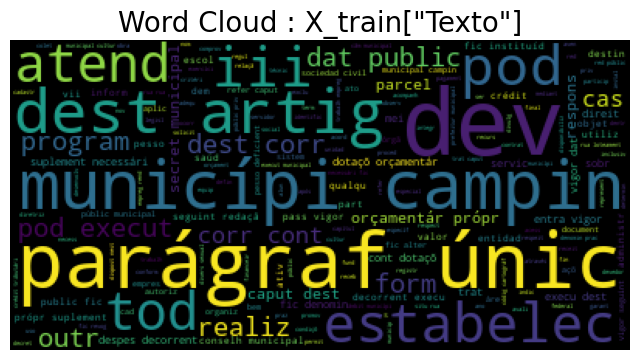

In [23]:
from wordcloud import WordCloud

# Generate a word cloud image
text = ' '.join(X_train['Texto'])
wordcloud = WordCloud().generate(text)

# Display the generated image the matplotlib way:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Word Cloud : X_train["Texto"]', fontsize=20)

Text(0.5, 1.0, 'Word Cloud : X_val["Texto"]')

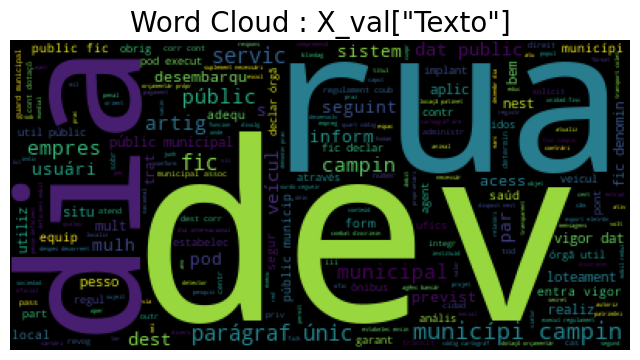

In [24]:
from wordcloud import WordCloud

# Generate a word cloud image
text = ' '.join(X_val['Texto'])
wordcloud = WordCloud().generate(text)

# Display the generated image the matplotlib way:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Word Cloud : X_val["Texto"]', fontsize=20)

Text(0.5, 1.0, 'Word Cloud : X_test["Texto"]')

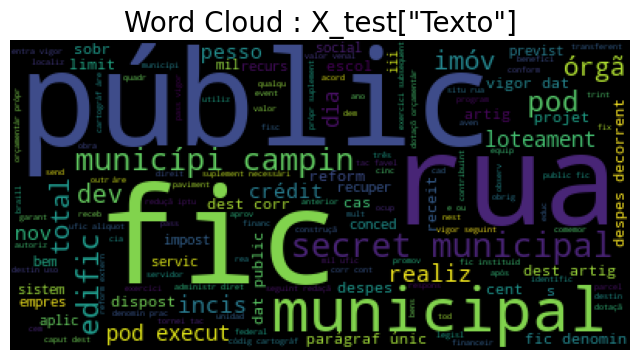

In [25]:
from wordcloud import WordCloud

# Generate a word cloud image
text = ' '.join(X_test['Texto'])
wordcloud = WordCloud().generate(text)

# Display the generated image the matplotlib way:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Word Cloud : X_test["Texto"]', fontsize=20)

### Processamento de dados com pipelines e um ColumnTransformer
Como temos dados numéricos e de texto, definimos os seguintes pipelines:
* Para o pipeline de dados numéricos, o __numerical_processor__ usa um MinMaxScaler. 
* Para o pipeline de dados de texto, o __text_processor__ usa  `CountVectorizer()` nos campos de texto.
As preparações seletivas dos recursos do conjunto de dados são reunidas em um ColumnTransformer coletivo, que será usado em um pipeline com um estimador. 

In [26]:
# Grab model features/inputs and target/output
numerical_features = ['Vereador', 'Partido']
text_features = ['Texto', 'Ementa']

model_features = numerical_features + text_features
model_target = 'Aprovado'

In [27]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

### COLUMN_TRANSFORMER ###
# Preprocess the numerical features
numerical_processor = Pipeline([
    ('num_imputer', SimpleImputer(strategy='mean')),
    ('num_scaler', MinMaxScaler()) 
                                ])
# Preprocess 1st text feature (larger vocabulary)
text_processor_0 = Pipeline([
    ('text_vect_0', CountVectorizer(binary=True, max_features=250))
                            ])

# Preprocess 2nd text feature 
text_precessor_1 = Pipeline([
    ('text_vect_1', CountVectorizer(binary=True, max_features=50))
                            ])

# Combine all data preprocessors from above 
# For each processor/step is specified a name, the actual process, and finally the features to be processed
data_preprocessor = ColumnTransformer([
    ('numerical_pre', numerical_processor, numerical_features),
    ('text_pre_0', text_processor_0, text_features[0]),
    ('text_pre_1', text_precessor_1, text_features[1])
                                      ]) 

### DATA PREPROCESSING ###
print('Datasets shapes before processing: ', X_train.shape, X_val.shape, X_test.shape)

X_train = data_preprocessor.fit_transform(X_train).toarray()
X_val = data_preprocessor.transform(X_val).toarray()
X_test = data_preprocessor.transform(X_test).toarray()

print('Datasets shapes after processing: ', X_train.shape, X_val.shape, X_test.shape)

Datasets shapes before processing:  (296, 4) (37, 4) (37, 4)
Datasets shapes after processing:  (296, 302) (37, 302) (37, 302)


Observa-se que o número de recursos nos conjuntos de dados passou de 4 para 302.

In [28]:
# salvando dados transformados
np.save('X_train_transformado.npy', X_train)
np.save('X_val_transformado.npy', X_val)
np.save('X_test_transformado.npy', X_test)

# recuperando dados transformados, se precisar
#X_train = np.load('X_train_transformado.npy')
#X_val = np.load('X_val_transformado.npy')
#X_test = np.load('X_test_transformado.npy)

### Treinamento de um classificador com um algoritmo integrado ao AWS SageMaker
Utilizamos o algoritmo  `LinearLearner()` do SageMaker com as seguintes opções:
* __Permissions -__  `role` está configurado como a role do AWS Identity and Access Management (IAM) do ambiente atual.
* __Compute power -__ Usaremos os parâmetros  `train_instance_count` = `1` e  `train_instance_type` = `ml.m4.xlarge`. 
* __Model type -__  `predictor_type` está configurado como __`binary_classifier`__, porque estamos com um problema de classificação binária. 

In [29]:
import sagemaker

# Call the LinearLearner estimator object
linear_classifier = sagemaker.LinearLearner(role=sagemaker.get_execution_role(),
                                           instance_count=1,
                                           instance_type='ml.m4.xlarge',
                                           predictor_type='binary_classifier')

Para definir as partes de treinamento, validação e teste do estimador, usaremos a função  `record_set()` do  `binary_estimator`. 

In [30]:
train_records = linear_classifier.record_set(X_train.astype('float32'),
                                            y_train.values.astype('float32'),
                                            channel='train')
val_records = linear_classifier.record_set(X_val.astype('float32'),
                                          y_val.values.astype('float32'),
                                          channel='validation')
test_records = linear_classifier.record_set(X_test.astype('float32'),
                                           y_test.values.astype('float32'),
                                           channel='test')

Com a função  `fit()` aplicamos uma versão distribuída do algoritmo Stochastic Gradient Descent (SGD). __Esse processo leva cerca de 3 a 4 minutos em uma instância ml.m4.xlarge do AWS Sagemaker.__

In [31]:
linear_classifier.fit([train_records,
                       val_records,
                       test_records],
                       logs=False)

INFO:sagemaker.image_uris:Same images used for training and inference. Defaulting to image scope: inference.
INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.
INFO:sagemaker:Creating training-job with name: linear-learner-2023-08-04-14-47-30-717



2023-08-04 14:47:31 Starting - Starting the training job...
2023-08-04 14:47:55 Starting - Preparing the instances for training...................
2023-08-04 14:49:33 Downloading - Downloading input data.....
2023-08-04 14:50:04 Training - Downloading the training image............
2023-08-04 14:51:09 Training - Training image download completed. Training in progress......
2023-08-04 14:51:40 Uploading - Uploading generated training model.
2023-08-04 14:51:51 Completed - Training job completed


### Avaliação do modelo

Usaremos a análise do SageMaker para ver métricas de performance do conjunto de testes. 

O linear learner apresenta métricas que são calculadas durante o treinamento. É possível usar essas métricas ao ajustar o modelo. As métricas disponíveis para o conjunto de validação são:

- objective_loss - No caso de um problema de classificação binária, será o valor médio da perda logística para cada época
- binary_classification_accuracy - A precisão do modelo final no conjunto de dados, ou seja, quantas previsões o modelo acertou
- precision - Quantifica o número de previsões de classes positivas que são de fato positivas
- recall - Quantifica o número de previsões de classes positivas
- binary_f_beta - A média harmônica das métricas de precisão e recall

Neste exemplo, é importante observar quantas previsões estavam corretas. O uso da métrica **binary_classification_accuracy** é apropriado.

In [32]:
sagemaker.analytics.TrainingJobAnalytics(linear_classifier._current_job_name, 
                                         metric_names = ['test:binary_classification_accuracy']
                                        ).dataframe()

INFO:botocore.credentials:Found credentials from IAM Role: BaseNotebookInstanceEc2InstanceRole


,timestamp,metric_name,value
0,0.0,test:binary_classification_accuracy,0.864865


In [33]:
sagemaker.analytics.TrainingJobAnalytics(linear_classifier._current_job_name).dataframe()

INFO:botocore.credentials:Found credentials from IAM Role: BaseNotebookInstanceEc2InstanceRole


,timestamp,metric_name,value
0,0.0,train:progress,71.666667
1,0.0,test:binary_f_beta,0.883721
2,0.0,test:recall,0.904762
3,0.0,train:objective_loss,0.411268
4,0.0,test:objective_loss,0.319160
5,0.0,validation:binary_f_beta,0.923077
6,0.0,validation:objective_loss,0.353231
7,0.0,validation:objective_loss:final,0.277247
8,0.0,test:precision,0.863636
9,0.0,validation:binary_classification_accuracy,0.918919


Podemos ver valor de acurácia aproximado de 0,86

Os resultados do sprint 6 são ligeiramente melhores do que os resultados do sprint 5. A acurácia do modelo no conjunto de teste aumentou de 85% para 86,48%. Os valores de recall, precisão e F1-score também aumentaram.

Essas melhorias podem ser atribuídas a um dos seguintes fatores:

- Uso do AWS SageMaker: O AWS SageMaker é uma plataforma de machine learning que oferece uma variedade de recursos e serviços que podem ajudar a melhorar o desempenho dos modelos de aprendizado de máquina.
- Uso de pipelines: O uso de pipelines para extrair características dos dados pode ajudar a melhorar a eficiência do processo de treinamento e o desempenho do modelo.
- O uso do ColumnTransformer permitiu que o modelo fosse treinado usando uma combinação de recursos numéricos e textuais, o que pode ter melhorado o desempenho do modelo.
- Uso de um modelo linear: O modelo linear é um modelo simples, mas pode ser muito eficaz para tarefas de classificação binária.

No geral, os resultados do sprint 6 são positivos e indicam que o modelo está sendo continuamente aprimorado. <br>
No entanto, é importante notar que os resultados do sprint 6 ainda são baseados em um conjunto de dados relativamente pequeno. Para garantir que o modelo seja robusto e confiável, é importante aplicar o modelo a casos reais de avaliação de projetos de lei e avaliar seu desempenho em um conjunto de dados maior.

Aqui está uma tabela que compara os resultados dos dois sprints:

Métrica	Sprint 5	Sprint 6 <br>
- Acurácia (conjunto de teste)	85%	86,48% <br>
- Recall (conjunto de teste)	89%	90,47% <br>
- Precisão (conjunto de teste)	86%	86,36% <br>
- F1-score (conjunto de teste)	88%	88,37% <br>
- Acurácia (conjunto de validação)	89%	91,89% <br>
- Recall (conjunto de validação)	94%	94,74% <br>
- Precisão (conjunto de validação)	90%	90% <br>
- F1-score (conjunto de validação)	92%	92,31% <br>

## Implementação do modelo em um endpoint

Aqui vamos fazer deployment do modelo para usar esse modelo em um ambiente de produção. 
Para implementar o modelo, é possível usar diferentes tipos de instância, como: _ml.t2.medium_, _ml.c4.xlarge_), entre outras. 
__Esse processo levará de 7 a 8 minutos.__

In [34]:

linear_classifier_predictor = linear_classifier.deploy(initial_instance_count = 1,
                                                       instance_type = 'ml.c5.large'
                                                      )

INFO:sagemaker.image_uris:Same images used for training and inference. Defaulting to image scope: inference.
INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.
INFO:sagemaker:Creating model with name: linear-learner-2023-08-04-14-53-12-457
INFO:sagemaker:Creating endpoint-config with name linear-learner-2023-08-04-14-53-12-457
INFO:sagemaker:Creating endpoint with name linear-learner-2023-08-04-14-53-12-457


-----------!

### Teste do endpoint
Agora que o endpoint está implementado, testaremos envio de dados de teste localmente e veremos previsões dos dados.

In [35]:
import numpy as np

# Get test data in batch size of 1 and make predictions.
prediction_batches = [linear_classifier_predictor.predict(batch)
                      for batch in np.array_split(X_test.astype('float32'), 1)
                     ]

# Get a list of predictions
print([pred.label['score'].float32_tensor.values[0] for pred in prediction_batches[0]])
print([pred.label['predicted_label'].float32_tensor.values[0] for pred in prediction_batches[0]])

[0.9307064414024353, 0.7662062644958496, 0.6908166408538818, 0.7351137399673462, 0.7759169340133667, 0.24400539696216583, 0.6762102842330933, 0.8057733178138733, 0.926773190498352, 0.08188279718160629, 0.6338246464729309, 0.0874352678656578, 0.03279603272676468, 0.9271020889282227, 0.886965811252594, 0.6446006894111633, 0.9379861354827881, 0.9660273790359497, 0.05775481089949608, 0.2587346136569977, 0.019770322367548943, 0.9777325391769409, 0.3026479184627533, 0.32081303000450134, 0.9669769406318665, 0.664711594581604, 0.09247226268053055, 0.10928460210561752, 0.3330250382423401, 0.8632752895355225, 0.08951292186975479, 0.12881121039390564, 0.0856323391199112, 0.9498496055603027, 0.7702388167381287, 0.5405683517456055, 0.7938365936279297]
[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0]


In [36]:
# Get test data for one data and make prediction.
prediction = [linear_classifier_predictor.predict(X_test.astype('float32')[0])]

# Get a list of predictions
print([pred.label['score'].float32_tensor.values[0] for pred in prediction[0]])
print([pred.label['predicted_label'].float32_tensor.values[0] for pred in prediction[0]])

[0.9307064414024353]
[1.0]


In [37]:
prediction = [linear_classifier_predictor.predict(X_test.astype('float32')[0])]
print([pred.label['score'] for pred in prediction[0]])
print([pred.label['predicted_label'] for pred in prediction[0]])

[float32_tensor {
  values: 0.9307064414024353
}
]
[float32_tensor {
  values: 1.0
}
]


In [38]:
test_data = X_test.astype('float32')[10]

In [39]:
prediction = [linear_classifier_predictor.predict(test_data)]

# Get a list of predictions
print([pred.label['score'].float32_tensor.values[0] for pred in prediction[0]])
print([pred.label['predicted_label'].float32_tensor.values[0] for pred in prediction[0]])

[0.6338245868682861]
[1.0]


## Remoção de artefatos do modelo

Após teste concluído, é importante excluir o endpoint, para não gerar custo de utilização de recursos AWS.


In [42]:
linear_classifier_predictor.delete_endpoint()

INFO:sagemaker:Deleting endpoint configuration with name: linear-learner-2023-08-04-14-53-12-457
INFO:sagemaker:Deleting endpoint with name: linear-learner-2023-08-04-14-53-12-457
